<a href="https://colab.research.google.com/github/ashish244co/Fastai-Deep-Learning/blob/master/faceEmoitionClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [0]:
folder = 'sad'
file = 'sad.csv'

In [0]:
folder = 'happy'
file = 'happy.csv'

In [0]:
path = Path('data/emotions')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [21]:
path.ls()

[PosixPath('data/emotions/.ipynb_checkpoints'),
 PosixPath('data/emotions/happy'),
 PosixPath('data/emotions/sad'),
 PosixPath('data/emotions/happy.csv'),
 PosixPath('data/emotions/sad.csv')]

In [0]:
classes = ['happy','sad']

In [24]:
download_images(path/file, dest, max_pics=200)

In [0]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [59]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [60]:
learn.fit_one_cycle(5,1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.357324,1.851270,0.343750,00:02
1,1.235305,1.476505,0.343750,00:01
2,1.122340,1.018323,0.281250,00:01
3,0.965993,0.733489,0.218750,00:01
4,0.838357,0.608373,0.250000,00:01


In [0]:
learn.unfreeze()

In [62]:
learn.fit_one_cycle(5,slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.381697,0.510983,0.187500,00:01
1,0.439539,0.446741,0.093750,00:01
2,0.361199,0.448797,0.125000,00:01
3,0.323952,0.468591,0.062500,00:01
4,0.266060,0.472711,0.093750,00:01


In [0]:
learn.save('class')

In [81]:
learn.load('class')

Learner(data=ImageDataBunch;

Train: LabelList (128 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
happy,happy,happy,happy,happy
Path: data/emotions;

Valid: LabelList (32 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
happy,sad,sad,sad,happy
Path: data/emotions;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

In [0]:
img = open_image('yeld.jpeg')

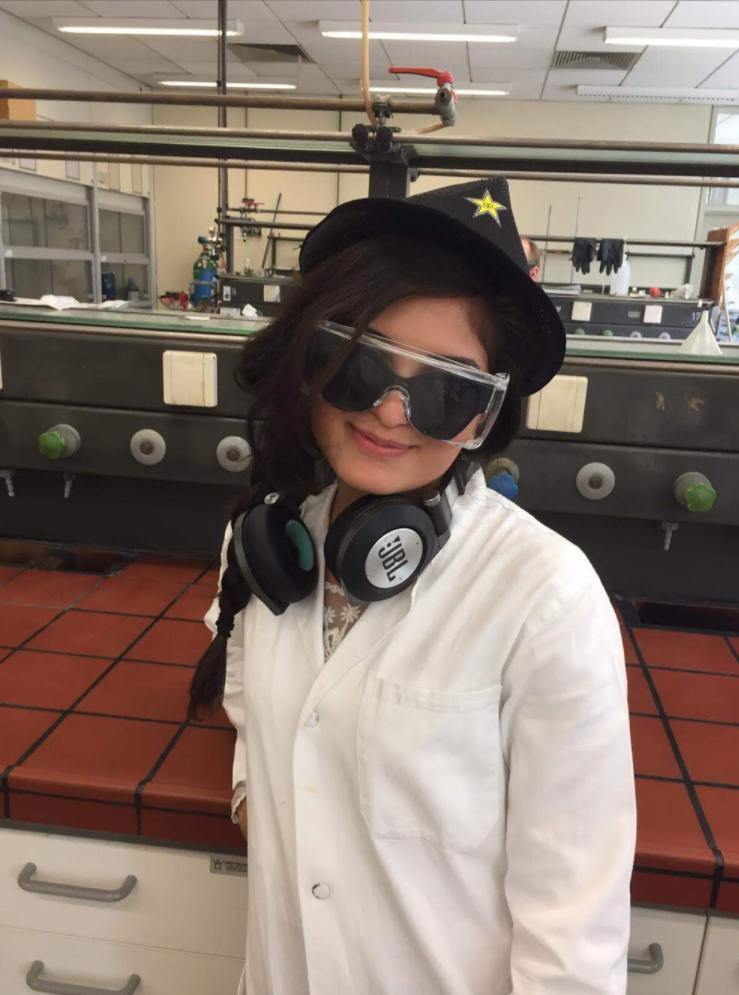

In [88]:
img

In [68]:
pred_class,pred_idx,outputs=learn.predict(img)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [90]:
pred_class,pred_idx,outputs

(Category tensor(0), tensor(0), tensor([0.9585, 0.0415]))

In [0]:
img1 = open_image('sad.jpeg')

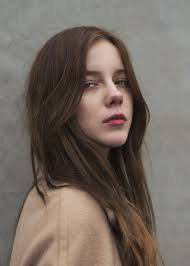

In [89]:
img1

In [83]:
pred_class,pred_idx,outputs=learn.predict(img)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [84]:
learn.predict(img1)

(Category tensor(1), tensor(1), tensor([0.1012, 0.8988]))